# Image Blurring and Smoothing


    Image blurring is achieved by convolving the image with a low-pass filter kernel. It is useful for removing noise. 
    It removes high frequency content (eg: noise, edges) from the image. So edges are blurred a little bit in this 
    operation.
    
    
## What is Convolution ?

    Mathematically, the convolution operation is the summation of the element-wise product of two matrices. Let’s take two 
    matrices, X and Y. If we convolve the matrix X using the filter Y, this operation will produce the matrix Z. 

    For example - 

                                       
                     1	2	3                              3	2	0
           X =       2	0	0                     Y =      3	0	1
                     7	9	1                              0	5	2


                                       
                     1x3=3	2x2=4	 3x0=0                 3    4    0
     ==>   Z =       2x3=6	0x0=0	 0x1=0          =      6    0    0     
                     7x0=0   9x5=45	 1x2=2                 0    45   2


    Finally, we compute the sum of all the elements in Z to get a scalar number, i.e. 3+4+0+6+0+0+0+45+2 = 60. 
    
    
 ## Convolving an Image
 
     Convolution is an operation that is performed on an image to extract features from it by applying a filter/kernel which
     slides over the image. A filter convolves an image and extracts features from each 'patch'.
     
     
     An image can be thought of as a bigger matrix and the kernel would be a relatively smaller matrix that sits on top of 
     the big image & slides from left to right and top to bottom until it has seen all the pixels. As the kernel slides over
     the image it applies the convolution operation at each pixel. The convolution may be applied in either the spatial or 
     frequency domai. It is used for blurring, sharpening, edge detection, and other image processing functions.
     
#### Spatial Domain -
   
     In the spatial domain, the first part of the convolution process multiplies the elements of the kernel by the matching
     pixel values when the kernel is centered over a pixel. The elements of the resulting array (which is the same size as 
     the kernel) are averaged, and the original pixel value is replaced with this result. 
     
#### Frequency Domain -
     
     In the frequency domain, convolution is performed by multiplying the FFT (Fast Fourier Transform) of the image by the 
     FFT of the kernel, and then transforming back into the spatial domain. The kernel is padded with zero values to enlarge 
     it to the same size as the image before the forward FFT is applied. 
     (NOTE: Read link 5 in the Ref section below to get a detailed process that happens internally)
     
     
     In image processing, a convolution requires 3 components:

        1. An input image.
        2. A kernel matrix that we are going to apply to the input image.
        3. An output image to store the output of the input image convolved with the kernel.
        
        
OpenCV provides a function **cv.filter2D()** to convolve a kernel with an image.


**Now let us see how convolution helps is image blurring / smoothing -**

        1. 2D Convolution (Image Filtering)
        2. Image Blurring (Image Smoothing)
            i) Averaging
            ii) Gaussian Blurring
            iii) Median Blurring
            iv) Bilateral Filtering
            v) Laplacian Filter
            
**We will discuss each of the above techniques.**

**Ref -**

1. https://docs.opencv.org/master/d4/d13/tutorial_py_filtering.html
2. https://pythonprogramming.net/blurring-smoothing-python-opencv-tutorial/
3. https://www.pyimagesearch.com/2016/07/25/convolutions-with-opencv-and-python/
4. http://people.csail.mit.edu/sparis/bf_course/ (**This has some good resource for understanding the math behind various blurring techniques**)
5. https://northstar-www.dartmouth.edu/doc/idl/html_6.2/Filtering_an_Imagehvr.html (**Image Filtering techniques**)

**Saurav Mishra**

# 2D Convolution (Image Filtering)

    As in one-dimensional signals, images also can be filtered with various low-pass filters (LPF), high-pass filters (HPF), 
    etc. 
    
    LPF helps in removing noise, blurring images, etc. 
    HPF filters help in finding edges in images.
    
#### Low Pass Filtering
    A low pass filter is the basis for most smoothing methods. An image is smoothed by decreasing the disparity between 
    pixel values by averaging nearby pixels. Smoothing is often used to reduce noise within an image or to produce a less 
    pixelated image. Most smoothing methods are based on low pass filters.

    Smoothing is also usually based on a single value representing the image, such as the average value of the image or the 
    median value.
    
    Using a low pass filter tends to retain the low frequency information within an image while reducing the high frequency
    information. An array of ones divided by the number of elements within the kernel.

                                                [1	 1	 1
                                        1/9  *   1	 1	 1
                                                 1	 1	 1]


#### High Pass Filtering
    A high pass filter is the basis for most sharpening methods. An image is sharpened when contrast is enhanced between 
    adjoining areas with little variation in brightness or darkness. Sharpening increases the contrast between bright and 
    dark regions to bring out features.
    
    A high pass filter tends to retain the high frequency information within an image while reducing the low frequency 
    information. The kernel of the high pass filter is designed to increase the brightness of the center pixel relative to 
    neighboring pixels. The kernel array usually contains a single positive value at its center, which is completely 
    surrounded by negative or zero values.
    
                                                [[ 0, -1, 0], 
                                                 [-1, 4, -1],
                                                 [ 0, -1, 0]]

**OpenCV provides a function cv.filter2D() to convolve a kernel with an image. Convolves an image with the kernel.**

**cv.filter2D()**

    The function applies an arbitrary linear filter to an image.


**Lets apply filtering techniques on some images.**

In [2]:
# Import the required libraries and packages

import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Image Smoothening - Using Low Pass Filter

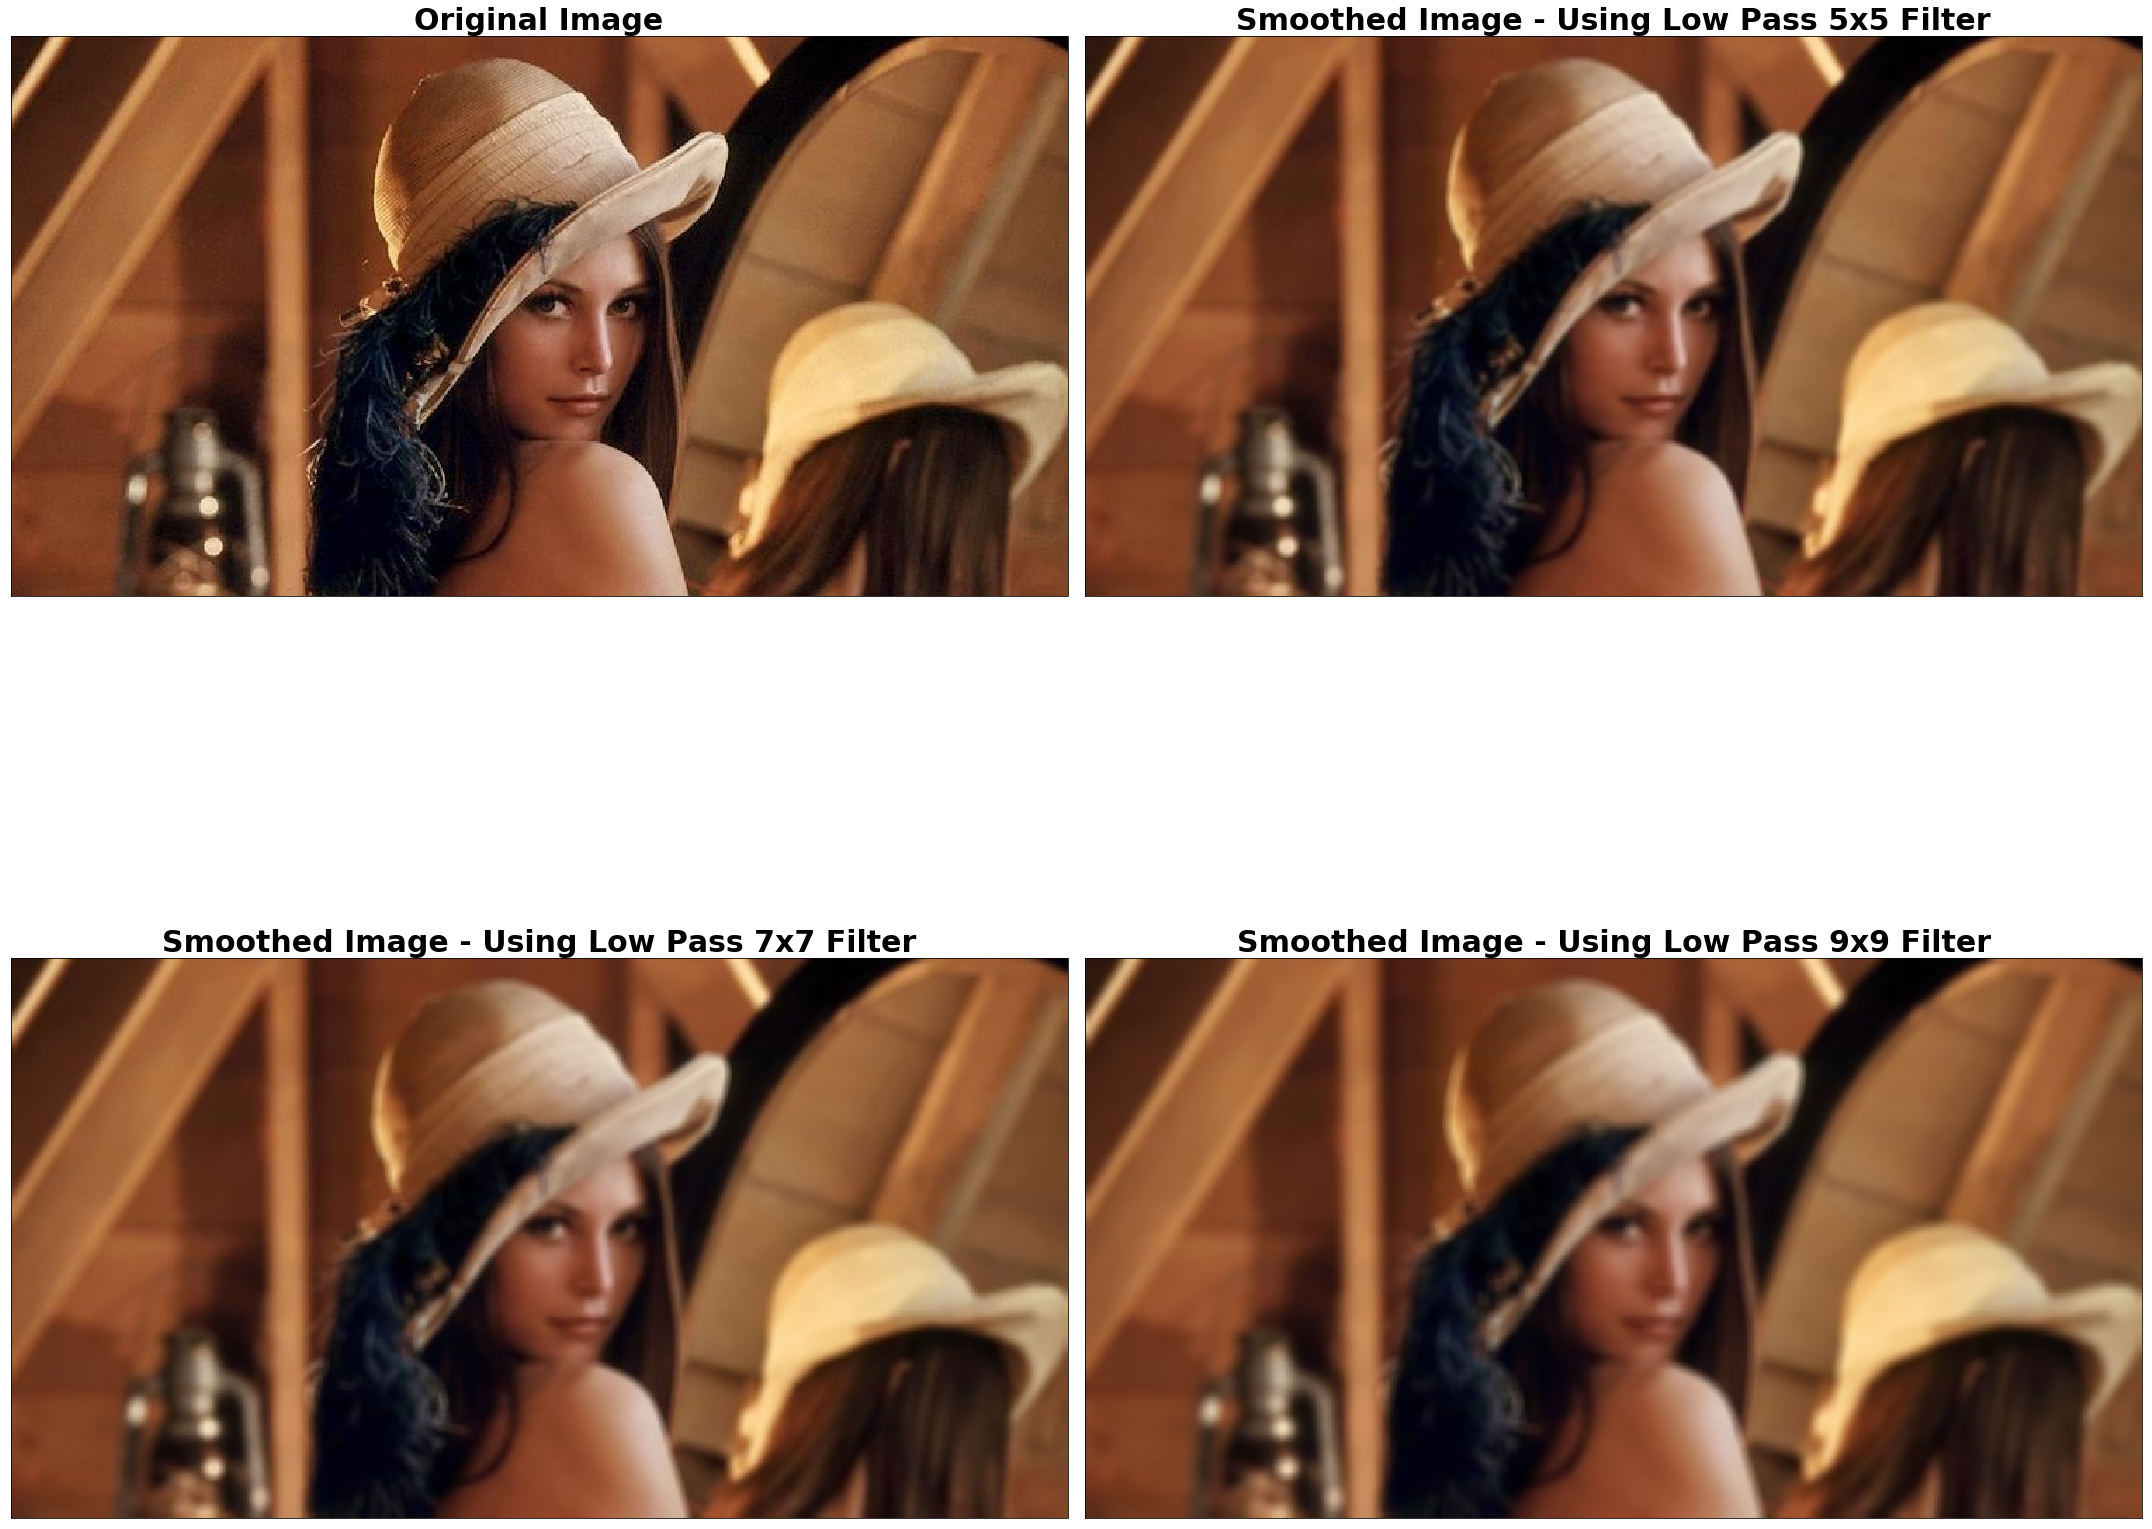

In [21]:
img_lena = cv2.imread('./Data/lena.jpg')
img_lena = cv2.cvtColor(img_lena, cv2.COLOR_BGR2RGB)

# define a low pass filter - averaging
kernel_5x5 = np.ones((5,5), np.float32)/25
kernel_7x7 = np.ones((7,7), np.float32)/49
kernel_9x9 = np.ones((9,9), np.float32)/81

smoothed_img_5x5 = cv2.filter2D(img_lena, -1, kernel_5x5)
smoothed_img_7x7 = cv2.filter2D(img_lena, -1, kernel_7x7)
smoothed_img_9x9 = cv2.filter2D(img_lena, -1, kernel_9x9)

fig = plt.figure(figsize=(30, 30))

plt.subplot(221)
plt.imshow(img_lena)
plt.title('Original Image', fontweight="bold", size=30)
plt.xticks([])
plt.yticks([])

plt.subplot(222)
plt.imshow(smoothed_img_5x5)
plt.title('Smoothed Image - Using Low Pass 5x5 Filter', fontweight="bold", size=30)
plt.xticks([])
plt.yticks([])
                                
plt.subplot(223)
plt.imshow(smoothed_img_7x7)
plt.title('Smoothed Image - Using Low Pass 7x7 Filter', fontweight="bold", size=30)
plt.xticks([])
plt.yticks([])
                                
plt.subplot(224)
plt.imshow(smoothed_img_9x9)
plt.title('Smoothed Image - Using Low Pass 9x9 Filter', fontweight="bold", size=30)
plt.xticks([])
plt.yticks([])

plt.tight_layout()

plt.show()

### Image Sharpening - Using High Pass Filter

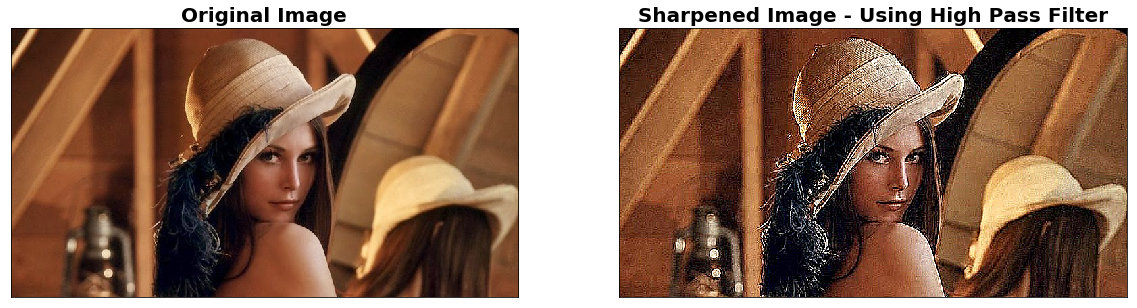

In [24]:
img_lena = cv2.imread('./Data/lena.jpg')
img_lena = cv2.cvtColor(img_lena, cv2.COLOR_BGR2RGB)

# define a high pass filter
sharpening_kernel = np.array([[-1,-1,-1], 
                              [-1,9,-1], 
                              [-1,-1,-1]])

# different version of the high pass filter
# sharpening_kernel = np.array([[0,-1,0], 
#                               [-1,5,-1], 
#                               [0,-1,0]])



sharpened_img = cv2.filter2D(img_lena, -1, sharpening_kernel)

plt.figure(figsize=(20, 20))

plt.subplot(121)
plt.imshow(img_lena)
plt.title('Original Image', fontweight="bold", size=20)
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.imshow(sharpened_img)
plt.title('Sharpened Image - Using High Pass Filter', fontweight="bold", size=20)
plt.xticks([])
plt.yticks([])

plt.show()

# Image Blurring (Image Smoothing)

    Image blurring is achieved by convolving the image with a low-pass filter kernel. It is useful for removing noise. 
    It removes high frequency content (eg: noise, edges) from the image. So edges are blurred a little bit in this 
    operation.
    
    
## Averaging

    This is done by convolving an image with a normalized box filter. It simply takes the average of all the pixels under 
    the kernel area and replaces the central element. This is done by the function cv2.blur() or cv2.boxFilter().
    A 3x3 normalized box filter can be implemented as below:
    
                                                 [[1	 1	 1],
                                        1/9  *    [1	 1	 1],
                                                  [1	 1	 1]]

  
  ***Note: To use an un-normalized box filter, pass the argument normalize=False to the function cv2.boxFilter().***


### cv2.blur():

    dst	=	cv2.blur(src, ksize[, dst[, anchor[, borderType]]])
    
    Blurs an image using the normalized box filter.
    
    The call blur(src, dst, ksize, anchor, borderType) is equivalent to 
    boxFilter(src, dst, src.type(), anchor, true, borderType) where normalized is set to True in boxFilter.
    
   **Parameters**
   
    src	        : input image; it can have any number of channels, which are processed independently, 
                      but the depth should be CV_8U, CV_16U, CV_16S, CV_32F or CV_64F.
    dst	        : output image of the same size and type as src.
    ksize	    : blurring kernel size.
    anchor	    : anchor point; default value Point(-1,-1) means that the anchor is at the kernel center.
    borderType	: border mode used to extrapolate pixels outside of the image
    
   **Ref (for a detailed defn)** - https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#ga8c45db9afe636703801b0b2e440fce37

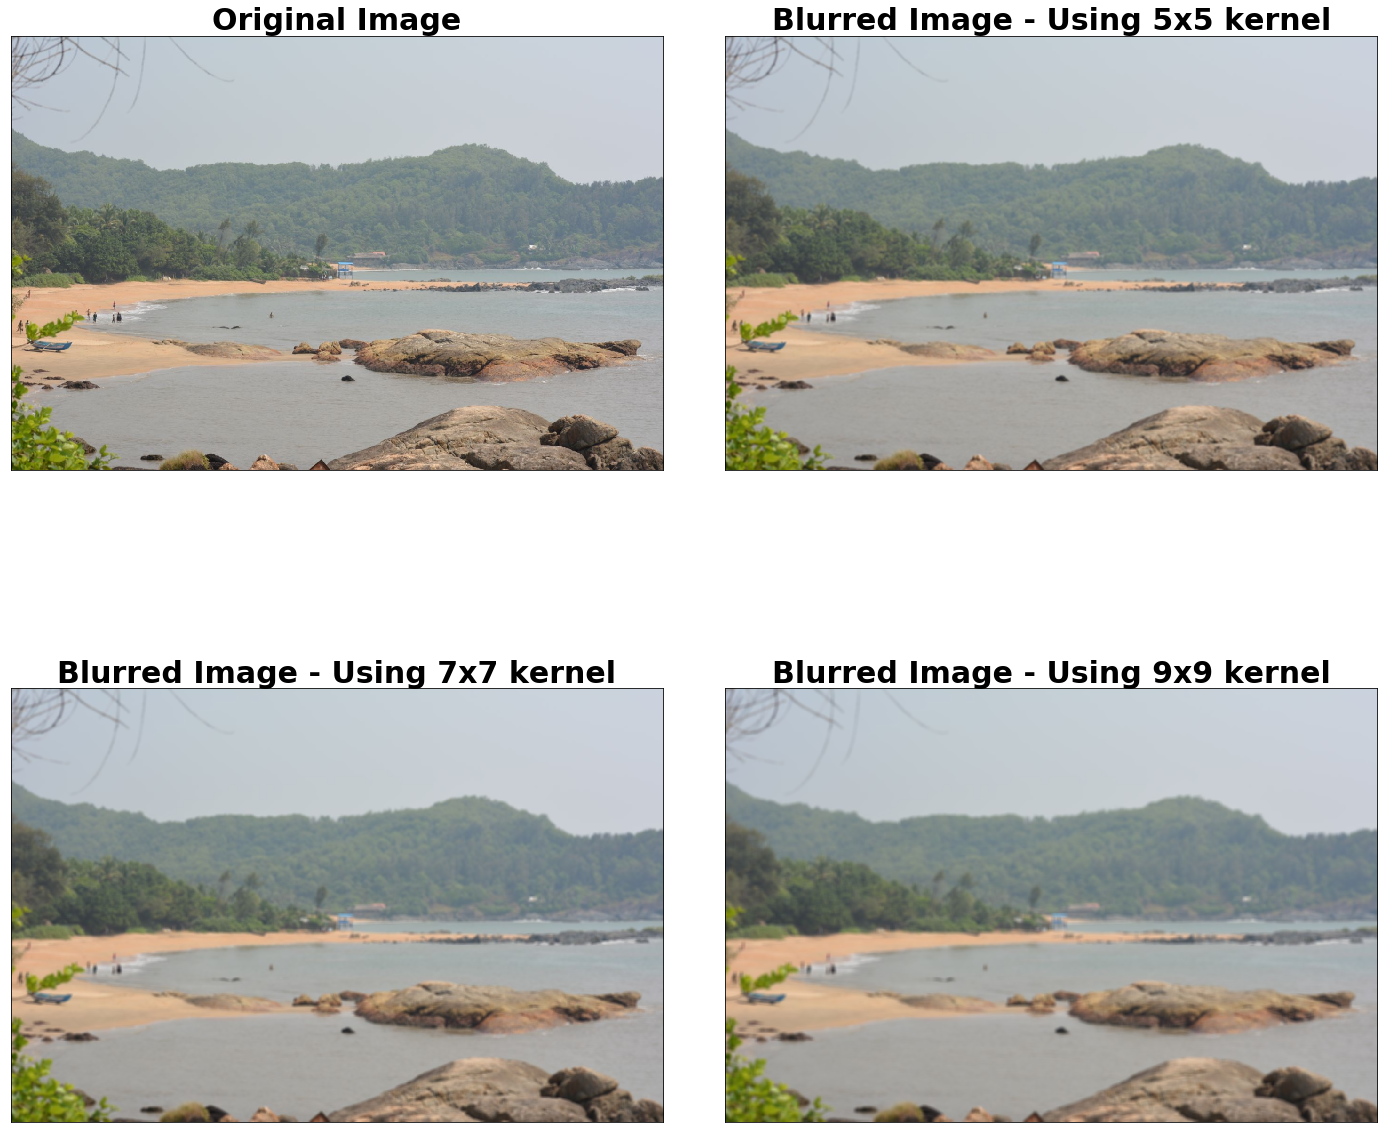

In [3]:
img_nature = cv2.imread('./Data/nature.jpg')
img_nature = cv2.cvtColor(img_nature, cv2.COLOR_BGR2RGB)


blurred_img_5x5 = cv2.blur(img_nature, (5,5))
blurred_img_7x7 = cv2.blur(img_nature, (7,7))
blurred_img_9x9 = cv2.blur(img_nature, (9,9))

plt.figure(figsize=(20, 20))

plt.subplot(221)
plt.imshow(img_nature)
plt.title('Original Image', fontweight="bold", size=30)
plt.xticks([])
plt.yticks([])

plt.subplot(222)
plt.imshow(blurred_img_5x5)
plt.title('Blurred Image - Using 5x5 kernel', fontweight="bold", size=30)
plt.xticks([])
plt.yticks([])
                                
plt.subplot(223)
plt.imshow(blurred_img_7x7)
plt.title('Blurred Image - Using 7x7 kernel', fontweight="bold", size=30)
plt.xticks([])
plt.yticks([])
                                
plt.subplot(224)
plt.imshow(blurred_img_9x9)
plt.title('Blurred Image - Using 9x9 kernel', fontweight="bold", size=30)
plt.xticks([])
plt.yticks([])

plt.tight_layout()

plt.show()


### cv2.boxFilter():

    dst	=	cv.boxFilter(src, ddepth, ksize[, dst[, anchor[, normalize[, borderType]]]])

    Blurs an image using the box filter.

    The function smooths an image using the kernel. Unnormalized box filter is useful for computing various integral
    characteristics over each pixel neighborhood, such as covariance matrices of image derivatives (used in dense optical 
    flow algorithms, and so on).
    
   **Parameters**
   
    src	        : input image.
    dst	        : output image of the same size and type as src.
    ddepth	    : the output image depth (-1 to use src.depth()).
    ksize	    : blurring kernel size.
    anchor	    : anchor point; default value Point(-1,-1) means that the anchor is at the kernel center.
    normalize	: flag, specifying whether the kernel is normalized by its area or not.
    borderType	: border mode used to extrapolate pixels outside of the image

   **Ref (for a detailed defn)** - https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#gad533230ebf2d42509547d514f7d3fbc3

([], <a list of 0 Text yticklabel objects>)

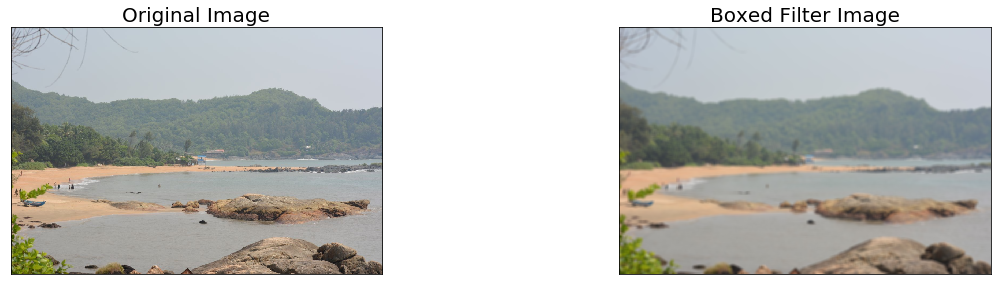

In [28]:
img_nature = cv2.imread('./Data/nature.jpg')
img_nature = cv2.cvtColor(img_nature, cv2.COLOR_BGR2RGB)

boxed_img_nature = cv2.boxFilter(img_nature.copy(), -1, (13,13), img_nature.copy(), (-1,-1), True, cv2.BORDER_DEFAULT)

plt.figure(figsize=(20, 10))

plt.subplot(221)
plt.imshow(img_nature)
plt.title('Original Image', size=20)
plt.xticks([])
plt.yticks([])

plt.subplot(222)
plt.imshow(boxed_img_nature)
plt.title('Boxed Filter Image', size=20)
plt.xticks([])
plt.yticks([])


## Gaussian Blurring

    This technique uses a Gaussian kernel. The gaussian kernel uses a low pass filter whose weights are derived from a 
    Gaussian function.

    A digital image is obtained by sampling and quantizing the continuous signal. A pixel value would resemble more like 
    the neighborhood pixels and less on the distant pixels. So, we should look for a distribution/function that assigns 
    more weights to the nearest pixels as compared to the distant pixels. This is the motivation for using Gaussian 
    distribution.
    
    The width and height of the kernel should be positive and odd. The standard deviation in the X and Y directions should 
    be given , sigmaX and sigmaY respectively. If only sigmaX is specified, sigmaY is taken as the same as sigmaX. If both 
    are given as zeros, they are calculated from the kernel size. 
    
   **`Gaussian blurring is highly effective in removing Gaussian noise from an image.`**
   


#### Approach - 1
### cv2.GaussianBlur(...) 
    dst	=	cv2.GaussianBlur(	src, ksize, sigmaX[, dst[, sigmaY[, borderType]]]	)
    
   **Parameters**
 - **src**	      -     input image; the image can have any number of channels, which are processed independently, but the                             depth should be CV_8U, CV_16U, CV_16S, CV_32F or CV_64F.
 - **dst**        - 	output image of the same size and type as src.
 - **ksize**      - 	Gaussian kernel size. ksize.width and ksize.height can differ but they both must be positive and odd. 
 - **sigmaX**     - 	Gaussian kernel standard deviation in X direction.
 - **sigmaY**     - 	Gaussian kernel standard deviation in Y direction; if sigmaY is zero, it is set to be equal to sigmaX.
 - **borderType** - 	pixel extrapolation method, see BorderTypes. BORDER_WRAP is not supported.
              
              


**Note:** The approximated kernel weights would not sum exactly 1 so, normalize the weights by the overall kernel sum. Otherwise, this will cause darkening or brightening of the image.


**Ref -**
1. https://theailearner.com/2019/05/06/gaussian-blurring/
2. https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#gaabe8c836e97159a9193fb0b11ac52cf1 - cv2.GaussianBlur
3. https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#gac05a120c1ae92a6060dd0db190a61afa - cv2.getGaussianKernel
4. https://docs.opencv.org/master/d4/d13/tutorial_py_filtering.html

([], <a list of 0 Text yticklabel objects>)

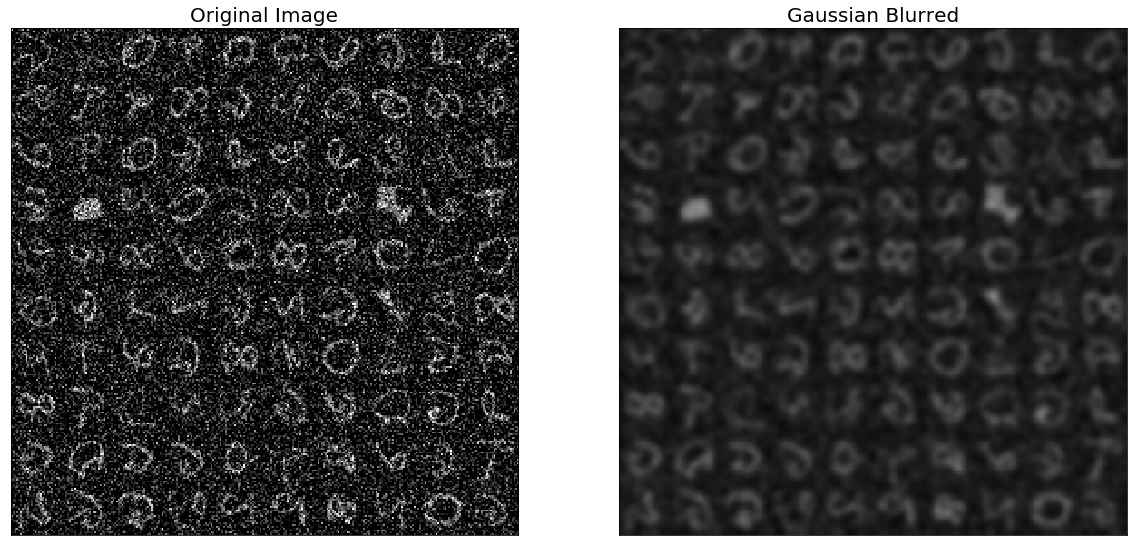

In [25]:
img_bangla = cv2.imread('./Data/noise_bangla.png')
img_bangla = cv2.cvtColor(img_bangla, cv2.COLOR_BGR2RGB)

gauss_blurr = cv2.GaussianBlur(img_bangla,(11,11),0)

plt.figure(figsize=(20, 10))

plt.subplot(121)
plt.imshow(img_bangla)
plt.title('Original Image', size=20)
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.imshow(gauss_blurr)
plt.title('Gaussian Blurred', size=20)
plt.xticks([])
plt.yticks([])

#### Approach - 2

### cv2.getGaussianKernel(...)

    Returns Gaussian filter coefficients. Two of such generated kernels can be passed to sepFilter2D. Those functions
    automatically recognize smoothing kernels (a symmetrical kernel with sum of weights equal to 1) and handle them 
    accordingly.

    retval	=	cv.getGaussianKernel(	ksize, sigma[, ktype]	) 
    
   **Parameters**
 - **ksize**  - kernel size, should be odd and positive (3,5,...)
 - **sigma**  - Gaussian standard deviation. If it is non-positive, it is computed from ksize as **`sigma = 0.3*((ksize-1)*0.5 - 1) + 0.8`**
 - **ktype**  - Type of filter coefficients (Optional)
 - **retval** - The gaussian kernel.
 
### cv2.sepFilter2D(...)

    Applies a separable linear filter to an image.

    The function applies a separable linear filter to the image. That is, first, every row of src is filtered with the 1D 
    kernel kernelX. Then, every column of the result is filtered with the 1D kernel kernelY. The final result shifted by 
    delta is stored in dst.

    dst	=	cv.sepFilter2D(	src, ddepth, kernelX, kernelY[, dst[, anchor[, delta[, borderType]]]]	)

   **Parameters**
 - **src**	      -      Source image.
 - **dst**	      -      Destination image of the same size and the same number of channels as src .
 - **ddepth**	  -      Destination image depth, see combinations
 - **kernelX**	  -      Coefficients for filtering each row.
 - **kernelY**	  -      Coefficients for filtering each column.
 - **anchor**	  -      Anchor position within the kernel. The default value (−1,−1) means that the anchor is at the kernel center.
 - **delta**	  -      Value added to the filtered results before storing them.
 - **borderType** -     	Pixel extrapolation method, see BorderTypes. BORDER_WRAP is not supported.
 
**Ref:**

1. https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#gac05a120c1ae92a6060dd0db190a61afa
2. https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#ga910e29ff7d7b105057d1625a4bf6318d

([], <a list of 0 Text yticklabel objects>)

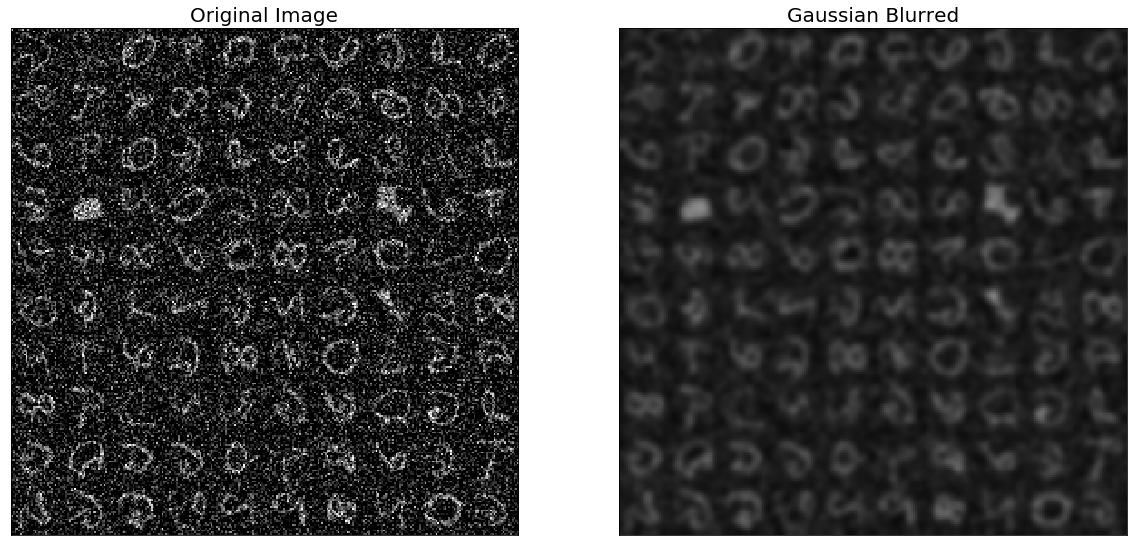

In [26]:
img = cv2.imread('./Data/noise_bangla.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
 
# Creates a 1-D Gaussian kernel
gauss_kernel_1d = cv2.getGaussianKernel(ksize=11,sigma=2)

# Apply the kernel to the image. 
gauss_kernel_2d = cv2.sepFilter2D(img, -1, gauss_kernel_1d, gauss_kernel_1d)

plt.figure(figsize=(20, 10))

plt.subplot(121)
plt.imshow(img)
plt.title('Original Image', size=20)
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.imshow(gauss_kernel_2d)
plt.title('Gaussian Blurred', size=20)
plt.xticks([])
plt.yticks([])

### `Both the above operations produce the same output.`

## Median Blurring

